# Analyze Sales Data with Pandas

# Easy

In [4]:
import pandas as pd

# Read the invoice file
df = pd.read_csv('/Users/abiepabustan/Downloads/coding-things/fct_invoice.csv')
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [18]:
# Read the customer file
json_df = pd.read_json('/Users/abiepabustan/Downloads/coding-things/dim_customer.json')
json_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [35]:
# 1. How many unique customers are in the dataset?
unique_customers = df['customer_id'].nunique()
print("Number of unique customers:", unique_customers)

Number of unique customers: 5191


In [36]:
# 2. What are the different categories of products available? How many unique categories are there?
unique_categories = df['category'].unique()
num_categories = len(unique_categories)

print("Different categories of products available:", unique_categories)
print("Number of unique categories:", num_categories)

Different categories of products available: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of unique categories: 8


In [13]:
# 3. Which payment method is the most popular? How many times was it used?
popular_payment_method = df['payment_method'].value_counts().idxmax()
num_times_used = df['payment_method'].value_counts().max()

print("The most popular payment method:", popular_payment_method)
print("Number of times it was used:", num_times_used)

The most popular payment method: Cash
Number of times it was used: 44447


In [40]:
df["payment_method"].unique()

array(['Credit Card', 'Debit Card', 'Cash'], dtype=object)

In [41]:
len(df["payment_method"].unique())

3

In [39]:
df["payment_method"].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

# Medium

In [15]:
import pandas as pd

new_df = pd.read_csv('/Users/abiepabustan/Downloads/coding-things/fct_invoice.csv')
new_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [16]:
json_df = pd.read_json('/Users/abiepabustan/Downloads/coding-things/dim_customer.json')
json_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [55]:
# 1. What are the three most popular categories, by total sales?
# Calculate total sales by category
category_sales = new_df.groupby('category')['price'].sum().sort_values(ascending=False)

# Get the top three popular categories
top_categories = category_sales.head(3)

print("The three most popular categories, by total sales:")
print(top_categories)

The three most popular categories, by total sales:
category
Clothing      31075684.64
Shoes         18135336.89
Technology    15772050.00
Name: price, dtype: float64


In [31]:
# 2. What are the total sales attributed to customers over the age of 45?
merged_df = pd.merge(new_df, json_df, left_on='customer_id', right_on='id')
total_sales_over_45 = merged_df[merged_df['age'] > 45]['price'].sum()
print("Total sales attributed to customers over the age of 45:", total_sales_over_45)

Total sales attributed to customers over the age of 45: 22370553.27


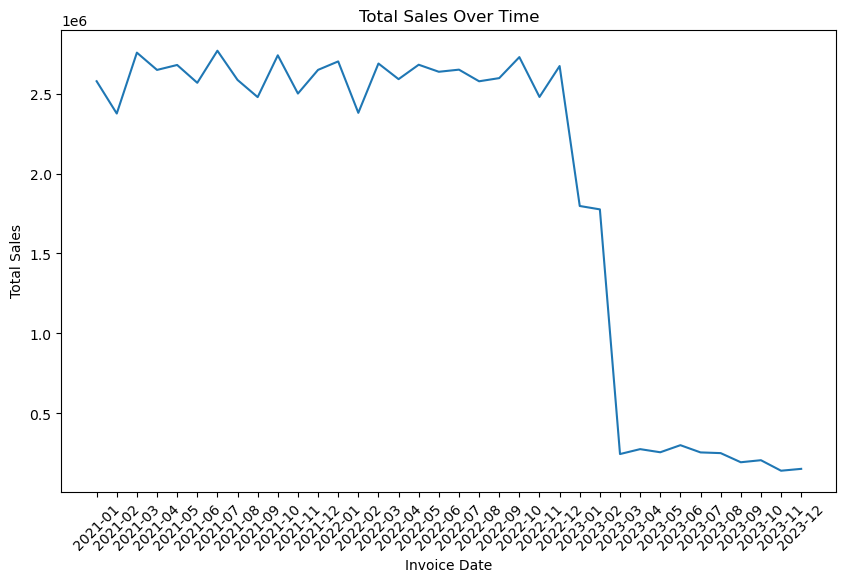

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert invoice date to datetime format
new_df['invoice_date'] = pd.to_datetime(new_df['invoice_date'])

# Calculate total sales by invoice date
monthly_sales = new_df.groupby(new_df['invoice_date'].dt.to_period('M'))['price'].sum()

# Convert period index to strings
monthly_sales.index = monthly_sales.index.astype(str)

# Plot the total sales over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.show()

# Hard

In [54]:
last_df = pd.read_csv('/Users/abiepabustan/Downloads/coding-things/fct_invoice.csv')
last_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [50]:
json_df = pd.read_json('/Users/abiepabustan/Downloads/coding-things/dim_customer.json')
json_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [53]:
# 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

# Merge the invoice and customer data
merged_df = pd.merge(new_df, json_df, left_on='customer_id', right_on='id')

# Create a new column for decade age range
merged_df['decade_age_range'] = merged_df['age'] // 10 * 10

# Create a pivot table showing sales breakdown by category and decade age range
pivot_table = merged_df.pivot_table(values='price', index='category', columns='decade_age_range', aggfunc='sum')

# Display the pivot table
pivot_table

decade_age_range,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0
category,,,,,,,,
Books,3469.35,21619.05,22997.70,23361.30,20664.60,21513.00,15437.85,7575.00
Clothing,518238.16,2818351.36,3074919.76,3066817.60,2803647.44,2910776.00,2117064.40,1228827.60
Cosmetics,29681.80,165079.60,198054.86,181343.60,160932.28,176627.04,114132.62,71236.32
Food & Beverage,3645.31,20428.38,23744.20,24460.71,19999.52,22190.89,14968.26,8561.51
Shoes,274277.69,1630061.72,1912141.62,1889335.16,1591650.84,1618058.32,1210542.89,708200.60
Souvenir,3296.13,15295.92,17548.08,17759.22,15084.78,15331.11,10592.19,6545.34
Technology,287700.00,1426950.00,1669500.00,1630650.00,1220100.00,1529850.00,977550.00,548100.00
Toys,17203.20,102466.56,115297.28,106910.72,94115.84,100244.48,74475.52,43043.84
